ymedia =  13.823529411764707
 f = -0.0218008255933954*x**2 + 0.463493292053666*x + 11.9411764705882
coef_determinacion r2 =  0.005742911488504957
0.57% de los datos
     se describe con el modelo


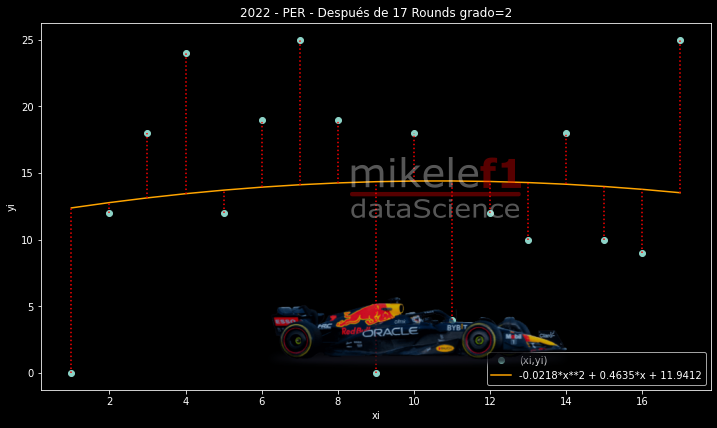

In [6]:
# regresion con polinomio grado m=2
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.image as image
from skimage.transform import resize

# INGRESO
#xi = [0,   1,    2,    3,    4,   5]
#yi = [2.1, 7.7, 13.6, 27.2, 40.9, 61.1]
xi = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
yi = [0,12,18,24,12,19,25,19,0,18,4,12,10,18,10,9,25]
#yi = [0,25,0,34,26,25,15,25,25,6,27,25,25,26,26,25,6]
#LEC
#yi = [26,19,26,15,18,0,12,0,10,12,32,0,8,8,15,18,18]
#RUS
#yi = [12,10,15,12,10,15,10,15,12,0,17,15,15,12,18,15,0]
#SAI
#yi = [18,15,0,5,15,12,18,0,19,25,6,11,12,15,4,12,15]
#MAX 2021
#yi = [8,25,18,19,25,0,26,25,26,3,2,12.5,25,2,18,18,25]

m  = 2

# PROCEDIMIENTO
xi = np.array(xi)
yi = np.array(yi)
n  = len(xi)

# llenar matriz a y vector B
k = m + 1
A = np.zeros(shape=(k,k),dtype=float)
B = np.zeros(k,dtype=float)
for i in range(0,k,1):
    for j in range(0,i+1,1):
        coeficiente = np.sum(xi**(i+j))
        A[i,j] = coeficiente
        A[j,i] = coeficiente
    B[i] = np.sum(yi*(xi**i))

# coeficientes, resuelve sistema de ecuaciones
C = np.linalg.solve(A,B)

# polinomio
x = sym.Symbol('x')
f = 0
fetiq = 0
for i in range(0,k,1):
    f = f + C[i]*(x**i)
    fetiq = fetiq + np.around(C[i],4)*(x**i)

fx = sym.lambdify(x,f)
fi = fx(xi)

# errores
ym = np.mean(yi)
xm = np.mean(xi)
errado = fi - yi

sr = np.sum((yi-fi)**2)
syx = np.sqrt(sr/(n-(m+1)))
st = np.sum((yi-ym)**2)

# coeficiente de determinacion
r2 = (st-sr)/st
r2_porcentaje = np.around(r2*100,2)

# SALIDA
print('ymedia = ',ym)
print(' f =',f)
print('coef_determinacion r2 = ',r2)
print(str(r2_porcentaje)+'% de los datos')
print('     se describe con el modelo')

# grafica
plt.rcParams['figure.figsize'] = [13, 13]

plt.style.use('dark_background')

fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))

with cbook.get_sample_data('/Users/rubenrodriguez/Documents/anaconda/fastf1/images/logog.png') as file:
    im = image.imread(file)

tm = 'RedBullRacing'
#tm = 'Mercedes'
#tm = 'Ferrari'
car = image.imread('./images/'+tm+'.png')
res = resize(car, (97, 329))

plt.plot(xi,yi,'o',label='(xi,yi)')
# plt.stem(xi,yi, bottom=ym)
plt.plot(xi,fi, color='orange', label=fetiq)

# lineas de error
for i in range(0,n,1):
    y0 = np.min([yi[i],fi[i]])
    y1 = np.max([yi[i],fi[i]])
    plt.vlines(xi[i],y0,y1, color='red',
               linestyle = 'dotted')
    
fig.figimage(im, xo=350, yo=210, zorder=13, alpha=.35)
fig.figimage(res, xo=255, yo=50, origin='upper', alpha=.80)

plt.xlabel('xi')
plt.ylabel('yi')
plt.legend()
plt.title('2022 - PER - Después de 17 Rounds grado='+str(m))
nombrearchivo = 'per_n2_2022_ro17.png'
plt.savefig(nombrearchivo)


plt.show()

In [8]:
x = 18
f = -0.0218008255933954*x**2 + 0.463493292053666*x + 11.9411764705882
f

13.220588235294077